In [90]:
import pandas as pd

data = pd.read_csv("kindey stone urine analysis.csv")
data

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [91]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

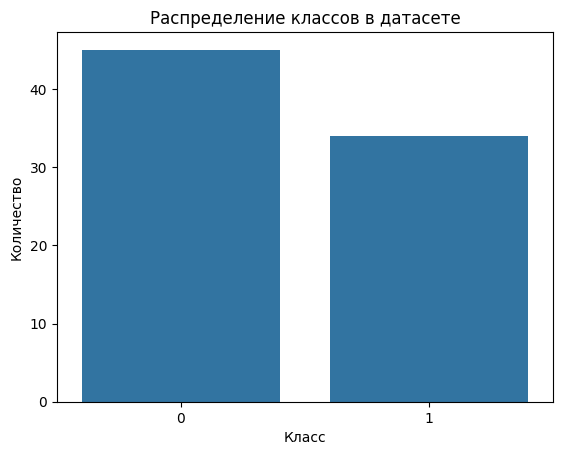

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target', data=data)
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.title('Распределение классов в датасете')
plt.show()

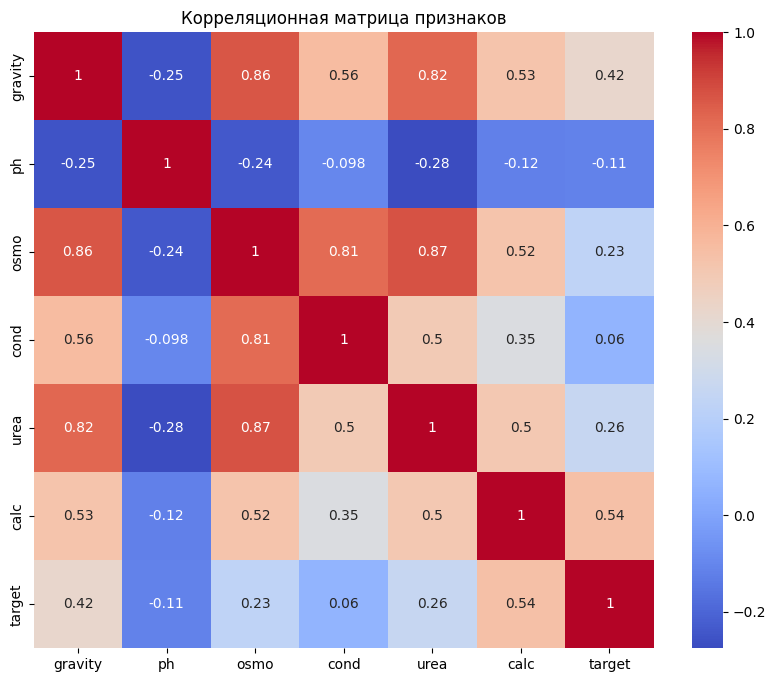

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Отчет об обычной модели:")
print(classification_report(y_test, y_pred))

Отчет об обычной модели:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        14
           1       0.67      0.40      0.50        10

    accuracy                           0.67        24
   macro avg       0.67      0.63      0.62        24
weighted avg       0.67      0.67      0.65        24



In [95]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность бинарной классификации до подбора гиперпараметров: {accuracy:.4f}')

Точность бинарной классификации до подбора гиперпараметров: 0.6667


In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Лучшие гиперпараметры:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [97]:
y_pred_best = best_model.predict(X_test)

print("Отчет о лучшей модели:")
print(classification_report(y_test, y_pred_best))

Отчет о лучшей модели:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.75      0.60      0.67        10

    accuracy                           0.75        24
   macro avg       0.75      0.73      0.73        24
weighted avg       0.75      0.75      0.74        24



In [98]:
accuracy = accuracy_score(y_test, y_pred_best)
print(f'Точность бинарной классификации после подбора гиперпараметров: {accuracy:.4f}')

Точность бинарной классификации после подбора гиперпараметров: 0.7500


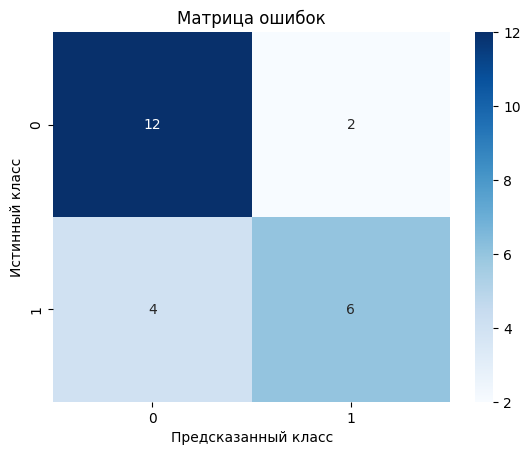

In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

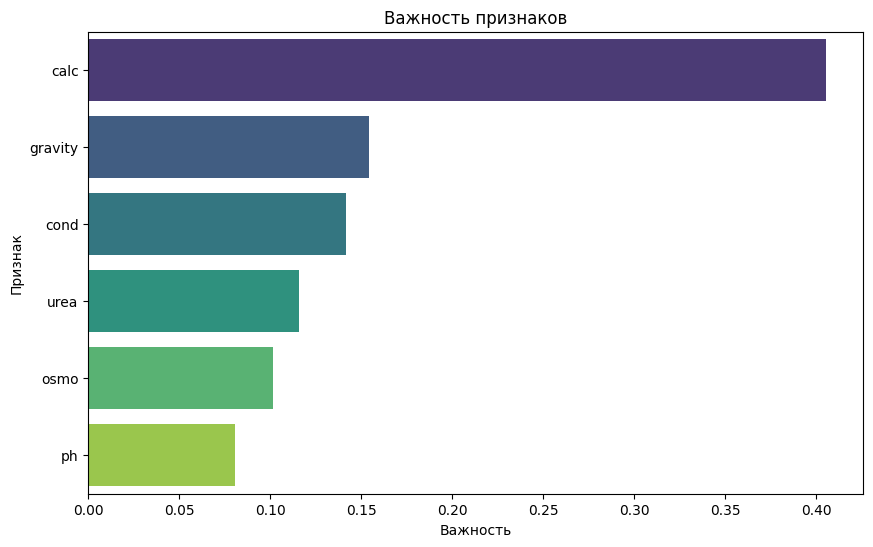

In [100]:
importances = best_model.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({'Признак': feature_names, 'Важность': importances})
feat_imp = feat_imp.sort_values('Важность', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Важность', y='Признак', data=feat_imp, palette='viridis', hue='Признак')
plt.title('Важность признаков')
plt.show()

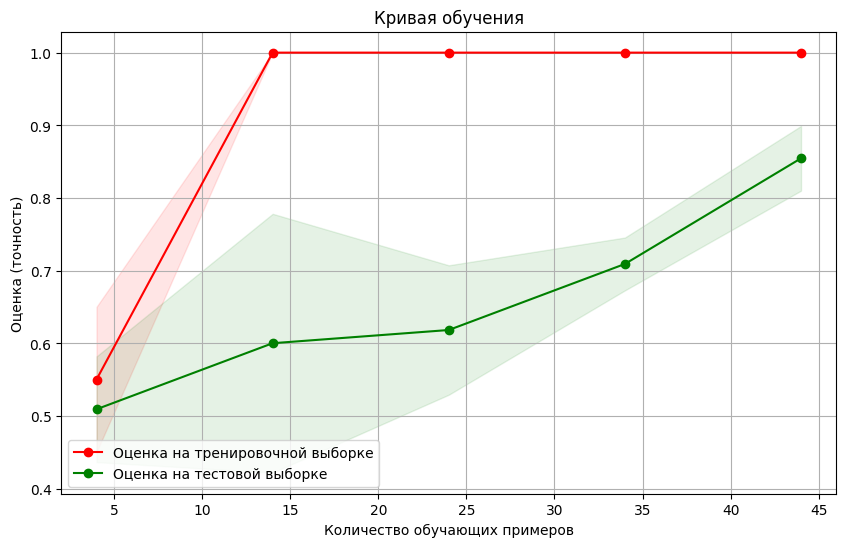

In [87]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_model, 
    X_train, 
    y_train, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.title("Кривая обучения")
plt.xlabel("Количество обучающих примеров")
plt.ylabel("Оценка (точность)")

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Оценка на тренировочной выборке")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Оценка на тестовой выборке")

plt.legend(loc="best")
plt.grid(True)
plt.show()